In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import random
from scipy import stats

# Figure S3

<a id='top'></a>

This notebook reproduces the data for figure S3. 

[1] [PSM$^{4}$ , PSM$^{3}$ , PSM$^{2}$  and TB Traces](#traces)

[2] [Last Her1 Peaks per experiment](#last): Obtain for each experiment the time for the last her1 peaks. 

[3] [Number of peaks](#peaks): Calculate the number of peaks each PSM4, PSM3 and TB perform.

[4] [Successive cucles slow and increase amplitude](#slow): Here we show how successive cycles slow and increase in amplitude. 


## Traces of PSM$^{4}$ , PSM$^{3}$, PSM$^{2}$ and TB cells  

### PSM4

In [2]:
# PSM4 

condition = 'PSM4'

looping_df = pd.read_excel('../Data/Figure S3/%s/Looping_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
mesp_df = pd.read_excel('../Data/Figure S3/%s/Mesp_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
maxima_df = pd.read_excel('../Data/Figure S3/%s/Maxima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
minima_df = pd.read_excel('../Data/Figure S3/%s/Minima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
max_times_df = pd.read_excel('../Data/Figure S3/%s/Peak_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])
min_times_df = pd.read_excel('../Data/Figure S3/%s/Minima_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])


# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
mesp_df = mesp_df[mesp_df.columns.dropna()]
maxima_df = maxima_df[maxima_df.columns.dropna()]
minima_df = minima_df[minima_df.columns.dropna()]
max_times_df = max_times_df[max_times_df.columns.dropna()]
min_times_df = min_times_df[min_times_df.columns.dropna()]

looping_df.head()

Experiment          419                                         \
  Cell Position           41           43           47           48   
0           NaN  1218.653451  1227.514493  1225.347191  1236.820144   
1           NaN  1156.946524  1187.053593  1320.246287  1263.056583   
2           NaN  1159.855540  1165.404494  1255.847534  1243.564744   
3           NaN  1265.204482  1533.073048  1229.455916  1197.243806   
4           NaN  1281.886243  2070.107311  1176.436409  1160.097917   

                                                                    ...  \
            54           56           68           70           73  ...   
0  1256.783046  1245.984919  1418.181151  1149.252734  1188.894799  ...   
1  1223.320675  1224.948259  1633.421182  1138.852086  1224.951220  ...   
2  1189.842759  1220.722000  1631.066748  1252.191946  1481.502457  ...   
3  1204.690180  1222.656834  1570.476071  1313.971429  1782.161728  ...   
4  1197.450262  1284.267742  1387.347222  1287.626098  1818.040842  ...   

           453                                                      \
            25           26           27           29           33   
0  1291.247140  1128.661935  1270.981928  1234.644766  1233.807171   
1  1304.680301  1150.872703  1239.514706  1185.528770  1195.451346   
2  1269.877551  1119.461538  1225.945504  1177.711401  1179.276596   
3  1239.516199  1123.548602  1157.395592  1167.427308  1163.874272   
4  1212.692888  1140.207617  1186.755946  1225.439898  1199.682617   

                                                                    
            34           35           36           38           39  
0  1138.038158  1348.715749  1150.823607  1140.717877  1149.790382  
1  1143.200734  1298.207930  1151.840506  1122.917007  1169.562814  
2  1147.715166  1281.167683  1166.770414  1130.010514  1179.691729  
3  1147.898922  1228.033408  1167.284076  1127.913520  1305.532650  
4  1136.517286  1194.920782  1211.897933  1206.106734  1449.368491  

[5 rows x 185 columns]

In [3]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

Number of experiments: 11
Number of cells in total: 174


In [4]:
# Cells 43 and 73 had 1 cycle only so we do not have their periods, therefore we do not analyze them
cells_id_per_exp = []
for i in np.unique(experiments):
    inds = np.where(i==np.array(experiments))[0]
    cells_id_per_exp.append(np.array(cells_id)[inds])

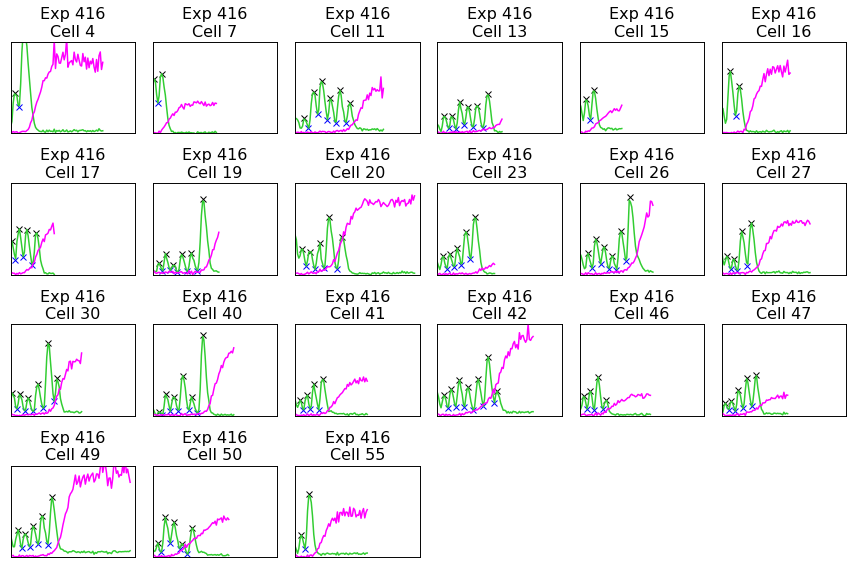

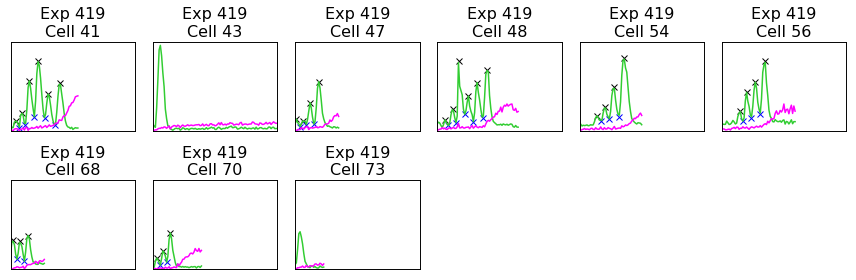

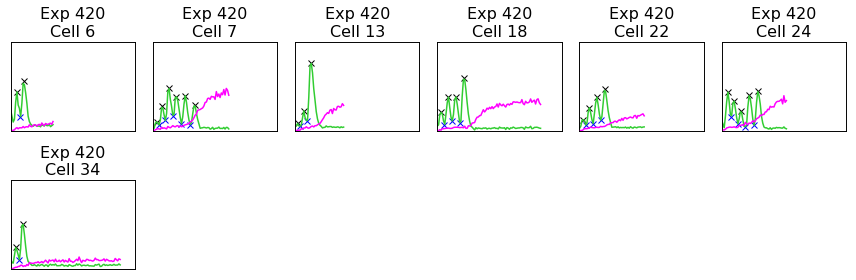

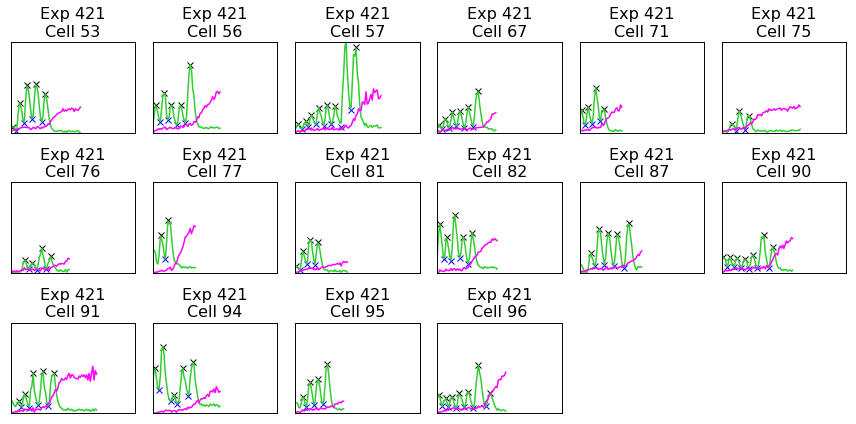

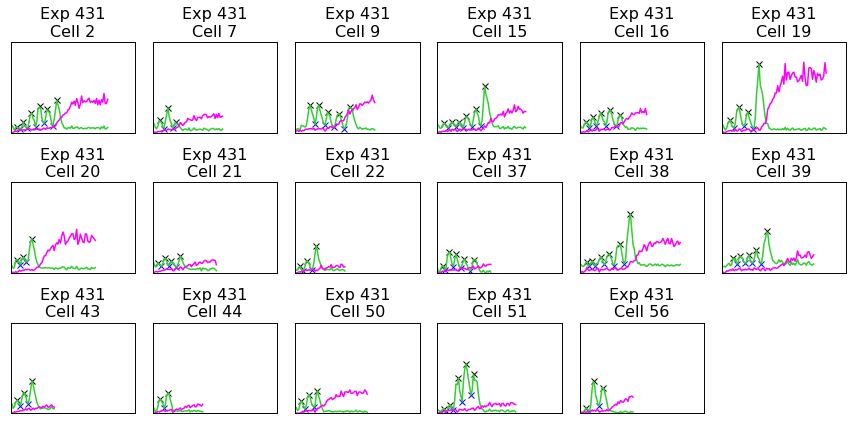

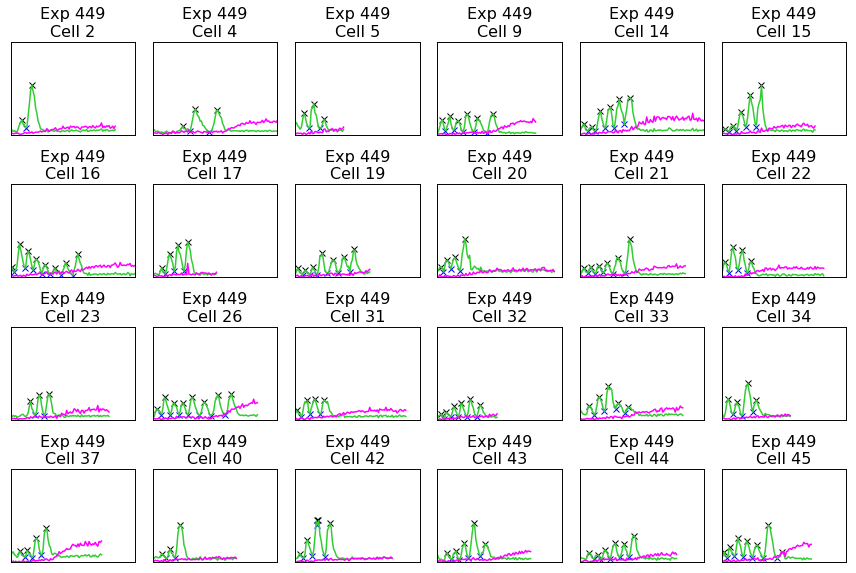

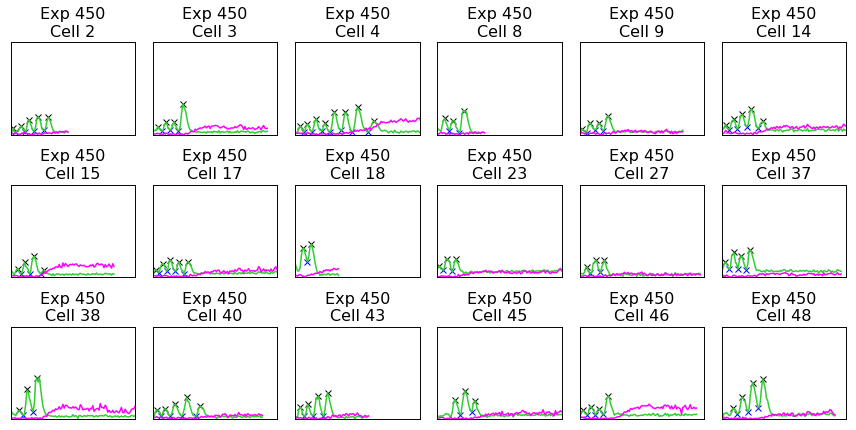

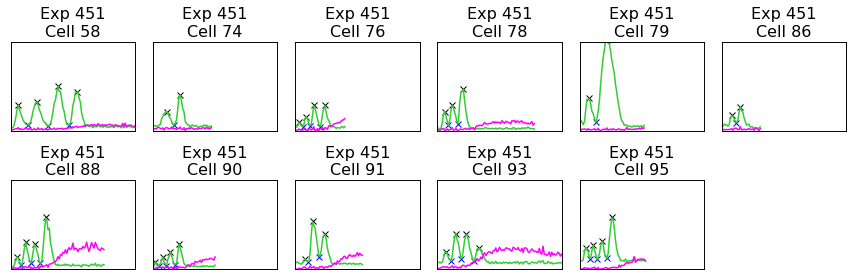

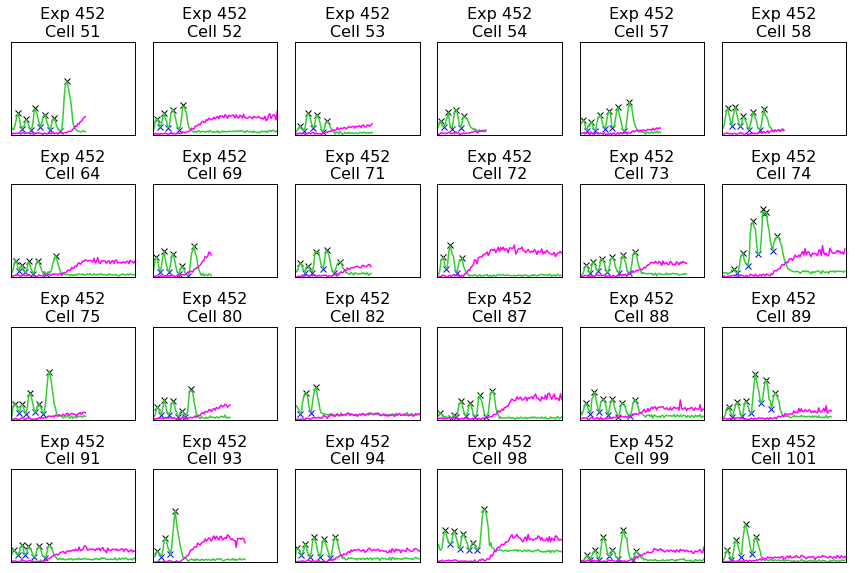

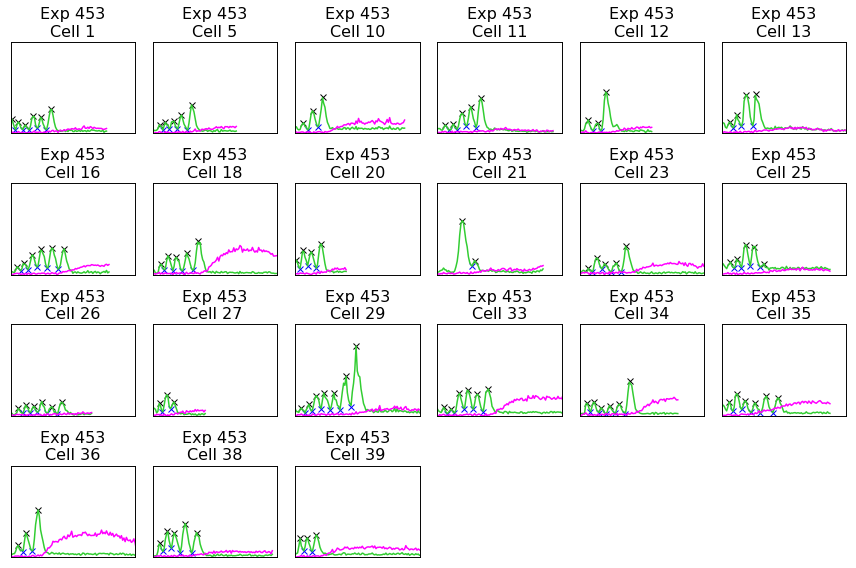

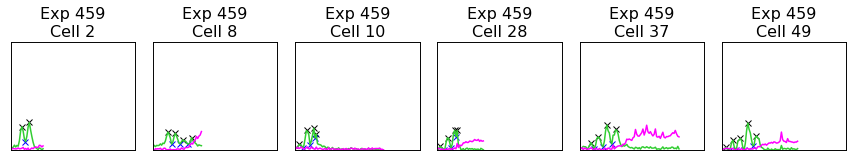

In [5]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
        else:


            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../Data/Figure S3/Results/LoopinMespPeaksTroughs_%s_Exp%d.pdf'%(condition,val1), format='pdf', bbox_inches='tight')
        

### PSM3

In [6]:
# PSM4 

condition = 'PSM3'

looping_df = pd.read_excel('../Data/Figure S3/%s/Looping_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
mesp_df = pd.read_excel('../Data/Figure S3/%s/Mesp_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
maxima_df = pd.read_excel('../Data/Figure S3/%s/Maxima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
minima_df = pd.read_excel('../Data/Figure S3/%s/Minima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
max_times_df = pd.read_excel('../Data/Figure S3/%s/Peak_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])
min_times_df = pd.read_excel('../Data/Figure S3/%s/Minima_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])


# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
mesp_df = mesp_df[mesp_df.columns.dropna()]
maxima_df = maxima_df[maxima_df.columns.dropna()]
minima_df = minima_df[minima_df.columns.dropna()]
max_times_df = max_times_df[max_times_df.columns.dropna()]
min_times_df = min_times_df[min_times_df.columns.dropna()]

looping_df.head()

Experiment          451                                                      \
    Position            2            5            6            7           10   
0        NaN  1150.512281  1237.557377  1173.277251  1153.309927  1185.196571   
1        NaN  1197.107975  1413.260152  1300.249075  1243.210243  1179.514286   
2        NaN  1327.968085  1430.665328  1361.020833  1272.613990  1288.475638   
3        NaN  1517.834270  1385.919028  1342.477876  1228.626478  1488.729648   
4        NaN  1475.083333  1286.350877  1293.748558  1217.908513  1785.120732   

                                                       ...          459  \
            12           13           14           19  ...           74   
0  1389.666667  1135.489043  1345.114558  1234.647583  ...  1202.658787   
1  1462.882571  1238.443896  1465.328859  1325.522663  ...  1182.774876   
2  1504.392630  1347.604952  1474.762887  1321.788360  ...  1227.626335   
3  1395.744213  1583.086310  1409.587396  1289.414758  ...  1333.673440   
4  1294.221591  1428.691525  1360.547927  1240.427800  ...  1316.387097   

                                                                    \
            79           80           84           85           87   
0  1137.713508  1511.920280  1117.434973  1165.148148  1130.580000   
1  1116.768448  1421.907925  1134.207650  1140.904550  1133.356522   
2  1138.819853  1338.057297  1149.146608  1170.933151  1304.559471   
3  1153.935768  1253.665049  1234.815972  1173.704883  1351.265997   
4  1158.708845  1186.058087  1244.038504  1155.934517  1314.477852   

                                                       
            96          102          103          105  
0  1150.860370  1165.427609  1177.325377  1245.531915  
1  1154.151316  1189.408435  1205.463989  1329.014085  
2  1216.181256  1238.284974  1237.542493  1306.276795  
3  1242.754808  1305.806881  1196.267157  1279.880378  
4  1196.917869  1290.437198  1209.295400  1222.353392  

[5 rows x 68 columns]

In [7]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

Number of experiments: 3
Number of cells in total: 65


In [8]:
cells_id_per_exp = []
for i in np.unique(experiments):
    inds = np.where(i==np.array(experiments))[0]
    cells_id_per_exp.append(np.array(cells_id)[inds])

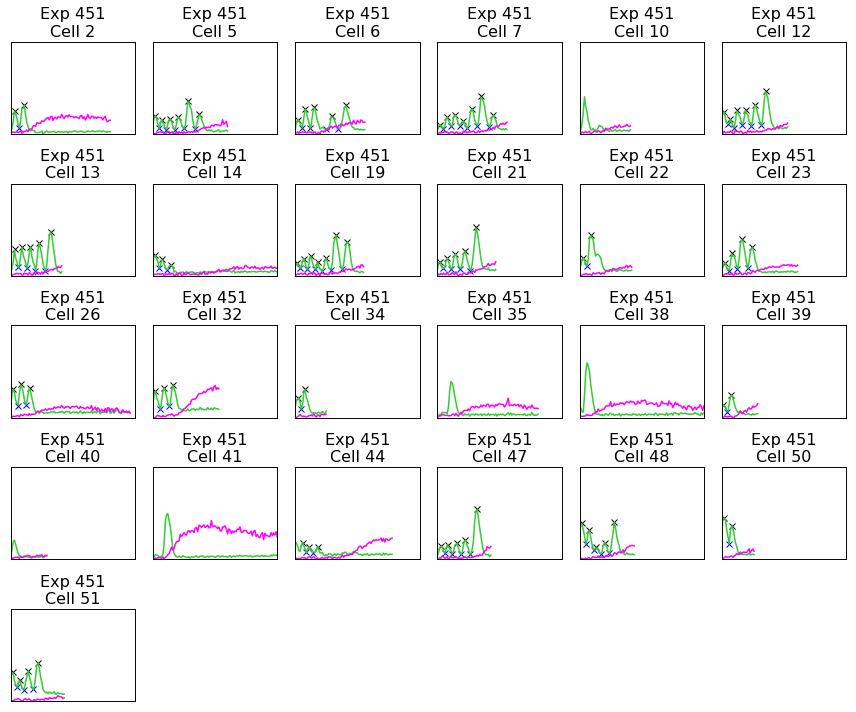

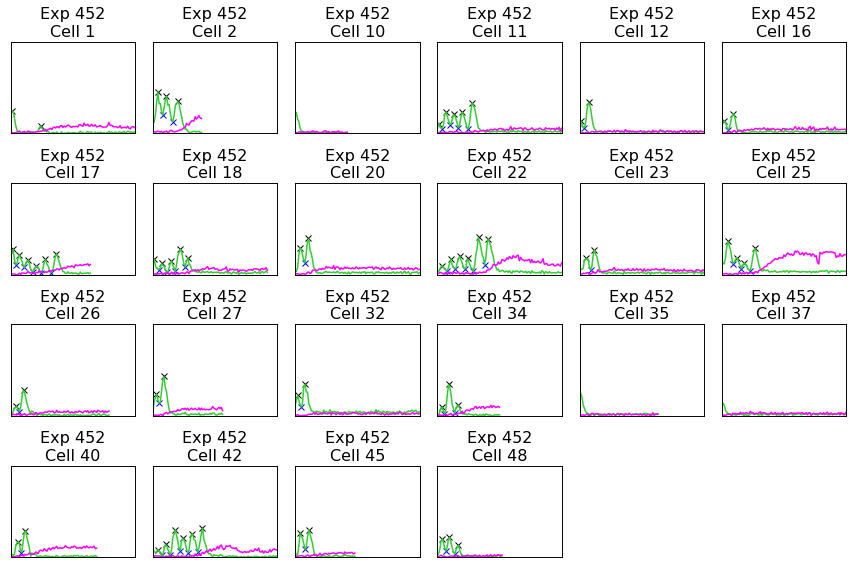

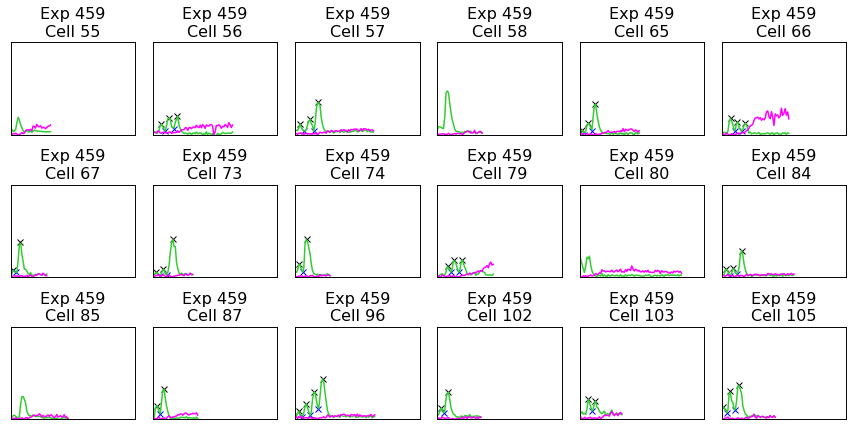

In [9]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
        else:


            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../Data/Figure S3/Results/LoopinMespPeaksTroughs_%s_Exp%d.pdf'%(condition,val1), format='pdf', bbox_inches='tight')
        

### TB

In [10]:
# PSM4 

condition = 'TB'

looping_df = pd.read_excel('../Data/Figure S3/%s/Looping_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
mesp_df = pd.read_excel('../Data/Figure S3/%s/Mesp_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
maxima_df = pd.read_excel('../Data/Figure S3/%s/Maxima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
minima_df = pd.read_excel('../Data/Figure S3/%s/Minima_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
max_times_df = pd.read_excel('../Data/Figure S3/%s/Peak_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])
min_times_df = pd.read_excel('../Data/Figure S3/%s/Minima_Time_%s_checked.xlsx'%(condition,condition), header=[0,1])


# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
mesp_df = mesp_df[mesp_df.columns.dropna()]
maxima_df = maxima_df[maxima_df.columns.dropna()]
minima_df = minima_df[minima_df.columns.dropna()]
max_times_df = max_times_df[max_times_df.columns.dropna()]
min_times_df = min_times_df[min_times_df.columns.dropna()]

looping_df.head()

Experiment          416                                                      \
    Position           61           62           74           90           98   
0        NaN  1186.071856  1157.031209  1200.211043  1274.951857  1158.458874   
1        NaN  1184.121528  1177.524862  1172.709379  1262.929191  1165.539767   
2        NaN  1155.197446  1339.662500  1302.896454  1262.715673  1163.166835   
3        NaN  1149.850610  1391.802862  1355.653453  1354.661094  1147.447800   
4        NaN  1150.457573  1257.256127  1347.119255  1372.018158  1284.891111   

                                           431  ...          453               \
            99          111 111.1           59  ...           76           78   
0  1193.032609  1134.397906   NaN  1190.094134  ...  1110.195373  1124.379761   
1  1180.054857  1152.438875   NaN  1184.209845  ...  1114.318296  1126.378076   
2  1162.386681  1153.257591   NaN  1170.272608  ...  1135.928483  1120.878151   
3  1203.826403  1185.315733   NaN  1176.493861  ...  1182.313283  1137.655650   
4  1240.833514  1177.615860   NaN  1159.711970  ...  1183.211735  1159.717454   

                                                                    \
            83           90           93           94           97   
0  1133.513953  1101.864249  1115.479793  1095.944191  1171.545455   
1  1112.765755  1117.500000  1115.758032  1135.651685  1221.343226   
2  1116.105711  1145.929175  1124.764170  1182.029797  1227.237402   
3  1122.540574  1141.115016  1133.425275  1171.590858  1283.276748   
4  1175.317497  1130.465368  1146.133475  1129.715342  1269.809441   

                                          
            98          105          108  
0  1091.042759  1127.662312  1118.870732  
1  1120.794872  1154.045263  1141.340502  
2  1145.500655  1162.209889  1148.194346  
3  1132.183432  1167.388832  1131.672269  
4  1112.947067  1149.224665  1140.748436  

[5 rows x 41 columns]

In [11]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

Number of experiments: 3
Number of cells in total: 38


In [12]:
cells_id_per_exp = []
for i in np.unique(experiments):
    inds = np.where(i==np.array(experiments))[0]
    cells_id_per_exp.append(np.array(cells_id)[inds])

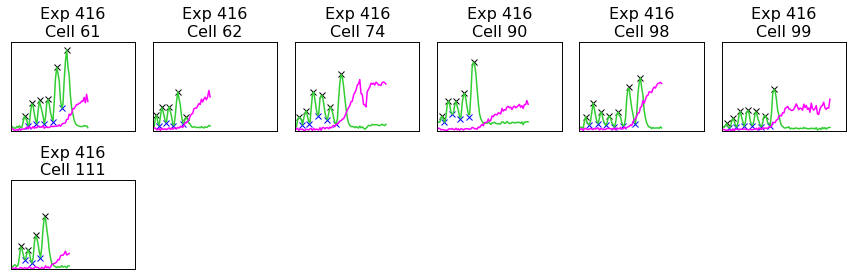

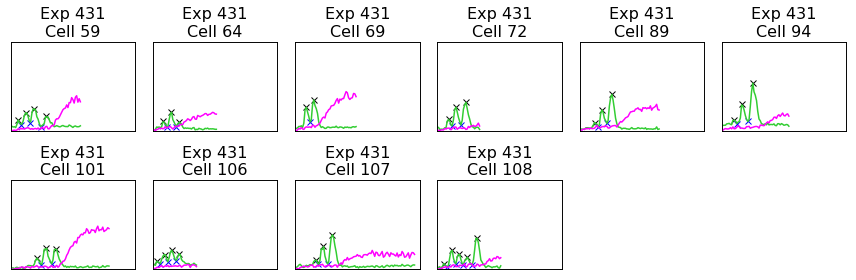

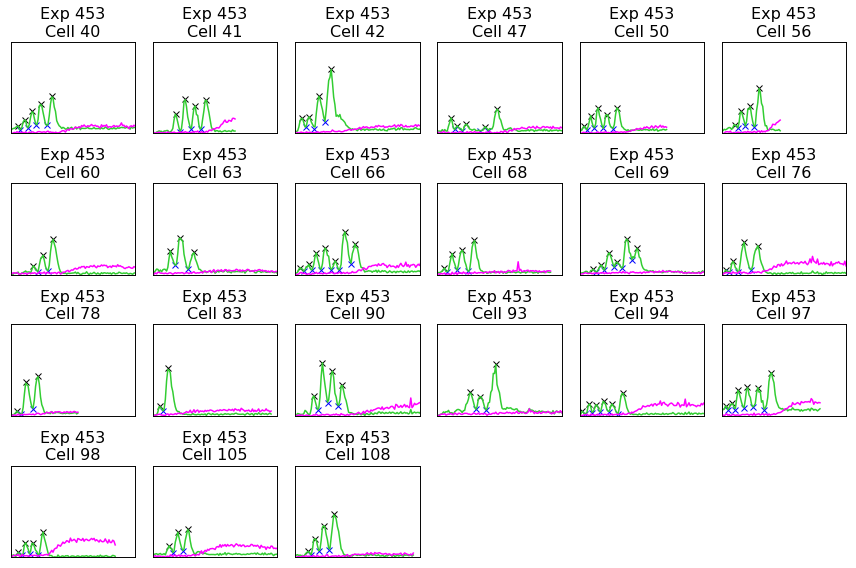

In [13]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        
        max_val = maxima_df[val1][val2].dropna().to_numpy()
        min_val = minima_df[val1][val2].dropna().to_numpy()
        max_time = max_times_df[val1][val2].dropna().to_numpy()
        min_time = min_times_df[val1][val2].dropna().to_numpy()
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:

            ax.plot(max_time-10, max_val, "xk"); plt.plot(min_time-10, min_val, "xb"); 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
        else:


            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../Data/Figure S3/Results/LoopinMespPeaksTroughs_%s_Exp%d.pdf'%(condition,val1), format='pdf', bbox_inches='tight')
        

### PSM2

In [14]:
# PSM4 

condition = 'PSM2'

looping_df = pd.read_excel('../Data/Figure S3/%s/Looping_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])
mesp_df = pd.read_excel('../Data/Figure S3/%s/Mesp_Intensity_%s_checked.xlsx'%(condition,condition), header=[0,1])


# Remove columns which are empty (no headers)
looping_df = looping_df[looping_df.columns.dropna()]
mesp_df = mesp_df[mesp_df.columns.dropna()]

looping_df.head()

Experiment          419                                         \
  Cell position            2            7            9           12   
0           NaN  2120.518610  1318.852679  1377.520652  1307.755435   
1           NaN  2025.560586  1376.338219  1266.345085  1409.031532   
2           NaN  1736.849546  1372.966702  1219.676667  1487.879203   
3           NaN  1568.391247  1354.717890  1190.832564  1420.189310   
4           NaN  1340.627204  1255.943677  1177.612532  1352.568306   

                                                                    ...  \
            13           15           16           20           24  ...   
0  1281.062753  1466.817487  1320.966837  1245.929688  1193.917749  ...   
1  1217.489518  1528.504534  1468.650880  1275.068678  1171.814443  ...   
2  1173.859956  1767.407733  1577.281214  1337.104124  1160.414823  ...   
3  1143.708054  1851.482175  1573.009146  1475.371490  1138.849530  ...   
4  1140.386311  1983.255079  1472.987724  1533.589953  1142.837920  ...   

           421                                         420               \
            44           45           47 47.1           39           52   
0  1272.056533  1172.941043  1496.162760  NaN  1639.550119  1310.579545   
1  1208.091709  1242.560948  1439.244920  NaN  1396.327354  1199.563596   
2  1188.931877  1469.941307  1491.903465  NaN  1286.053422  1171.936009   
3  1172.176255  1533.782155  1353.713226  NaN  1163.803738  1142.597340   
4  1143.361011  1482.928652  1243.990741  NaN  1146.194411  1140.904943   

                                                       
            53           59           63           66  
0  1493.399527  1193.020808  1224.135572  1386.880536  
1  1359.718987  1147.229858  1203.524631  1317.538627  
2  1243.676039  1137.731272  1171.382388  1216.059178  
3  1152.918717  1147.517632  1168.401370  1183.894843  
4  1147.688217  1170.059113  1179.820418  1162.626149  

[5 rows x 35 columns]

In [15]:
experiments = []
cells_id = []

# Arrange experiments and cells
for i in range(1,len(looping_df.keys())):
    
    if type(looping_df.keys()[i][1]) == int:
    
        # Save the number of the experiment for each cell
        experiments.append(looping_df.keys()[i][0])
        # Save the cell id
        cells_id.append(looping_df.keys()[i][1])
    
print('Number of experiments: %d'%len(np.unique(experiments)))
print('Number of cells in total: %d'%len(cells_id))

Number of experiments: 3
Number of cells in total: 32


In [16]:
cells_id_per_exp = []
for i in np.unique(experiments):
    inds = np.where(i==np.array(experiments))[0]
    cells_id_per_exp.append(np.array(cells_id)[inds])

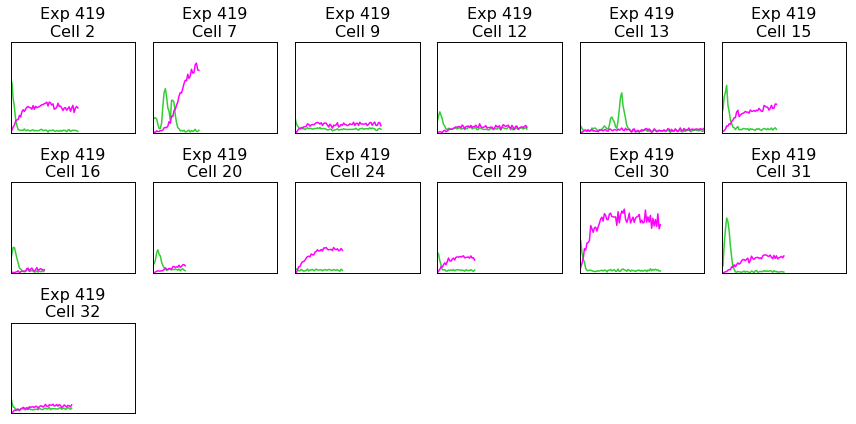

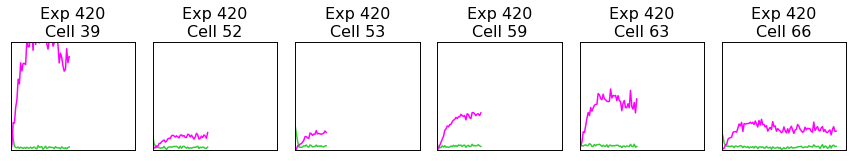

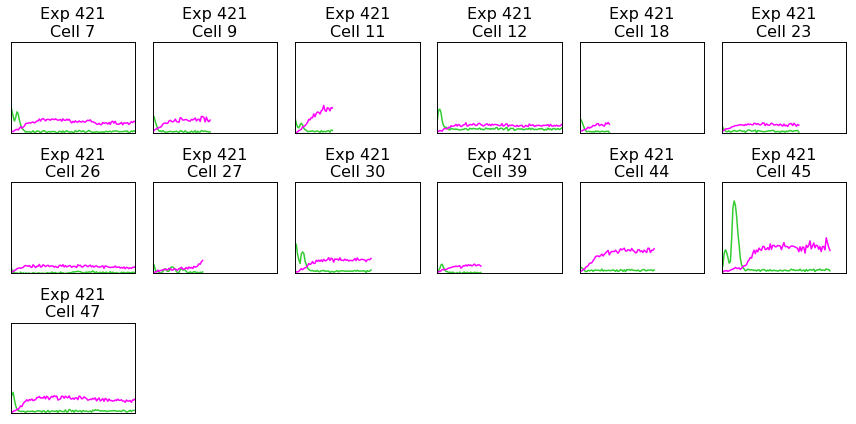

In [17]:
n_experiments = len(np.unique(experiments))

# Number of cells per experiments
cells_per_exp = []
experiments_id = np.unique(experiments)

for i in range(n_experiments):
    aux = np.where(experiments_id[i]==experiments)[0]
    cells_per_exp.append(len(aux))
    
# Plot peaks (max) and troughs (min) according to experiment
count = 0

for i,val1 in enumerate(np.unique(experiments)):
    
    n_cols =  6
    n_rows = np.ceil((len(cells_id_per_exp[i]) + 1) / n_cols)      

    plot_num = 1
    

    #size_fig = n_rows*(20/n_cols)
    # Initialize the figure size
    size_x = 2*n_cols
    size_y = n_rows*2
    
    fig = plt.figure(figsize=[size_x,size_y])

    for j,val2 in enumerate(cells_id_per_exp[i]):
        
        intensity_l = looping_df[val1][val2].dropna().to_numpy()
        intensity_m = mesp_df[val1][val2].dropna().to_numpy()
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1
            
        if np.size(max_val)>0:
 
            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0,1500])
            
            plt.tight_layout()
            
        else:

            ax.plot(np.arange(len(intensity_l))*10, intensity_l, color='limegreen'); 
            
            ax2=ax.twinx()
            ax2.plot(np.arange(len(intensity_m))*10, intensity_m-np.min(intensity_m), color='magenta');
            ax.set_title('Exp %d\nCell %d'%(val1, val2), fontsize = 16)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax2.set_xticks([])
            ax2.set_yticks([])
            
            ax.set_xlim([0,1000])
            ax.set_ylim([1100,2800])
            ax2.set_ylim([0, 1500])
            
            plt.tight_layout()
            
        count += 1  
        
    fig.savefig('../Data/Figure S3/Results/LoopinMespPeaksTroughs_%s_Exp%d.pdf'%(condition,val1), format='pdf', bbox_inches='tight')

## Last Her1 Peak times per experiment

<a id='last'></a>

If you want to go to the top of the notebook: [TOP](#top)

In [25]:
PSM2 = pd.read_excel('../Data/Figure S3/last_peak_time_axis(ADJ)_checked.xlsx', sheet_name='PSM2', header=[1,2])
PSM3 = pd.read_excel('../Data/Figure S3/last_peak_time_axis(ADJ)_checked.xlsx', sheet_name='PSM3', header=[1,2])
PSM4 = pd.read_excel('../Data/Figure S3/last_peak_time_axis(ADJ)_checked.xlsx', sheet_name='PSM4', header=[1,2])
TB = pd.read_excel('../Data/Figure S3/last_peak_time_axis(ADJ)_checked.xlsx', sheet_name='TB', header=[1,2])

### Obtain the cells and experiments IDs

In [26]:
PSM4_cells_id = []
PSM4_exps_id = []

for i in range(1,len(PSM4.keys())):
    if type(PSM4.keys()[i][1])==int:
        PSM4_exps_id.append(PSM4.keys()[i][0])
        PSM4_cells_id.append(PSM4.keys()[i][1])   

PSM3_cells_id = []
PSM3_exps_id = []

for i in range(1,len(PSM3.keys())):
    if type(PSM3.keys()[i][1])==int:
        PSM3_exps_id.append(PSM3.keys()[i][0])
        PSM3_cells_id.append(PSM3.keys()[i][1])

PSM2_cells_id = []
PSM2_exps_id = []

for i in range(1,len(PSM2.keys())):
    if type(PSM2.keys()[i][1])==int:
        PSM2_exps_id.append(PSM2.keys()[i][0])
        PSM2_cells_id.append(PSM2.keys()[i][1])

TB_cells_id = []
TB_exps_id = []

for i in range(1,len(TB.keys())):
    if type(TB.keys()[i][1])==int:
        TB_exps_id.append(TB.keys()[i][0])
        TB_cells_id.append(TB.keys()[i][1])
        
print('There are %d cells in the PSM2'%len(PSM2_cells_id))
print('There are %d cells in the PSM3'%len(PSM3_cells_id))
print('There are %d cells in the PSM4'%len(PSM4_cells_id))
print('There are %d cells in the TB'%len(TB_cells_id))

There are 32 cells in the PSM2
There are 65 cells in the PSM3
There are 174 cells in the PSM4
There are 38 cells in the TB


### Match the experiments

Each time one of the PSM regions were taken out, the PSM4 was also taken out to have a reference from the same tissue. Here we will compare each of those experiments separatly and together to show there is no variability due to the experiment per se.  

In [27]:
# PSM2 vs PSM4

exps_all = np.unique(PSM2_exps_id)

PSM4_42_lp = []
PSM2_42_lp = []

for i,val in enumerate(exps_all):
    inds = np.where(val == PSM2_exps_id)[0]
    cells_ids = np.array(PSM2_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(PSM2[val][j].dropna()))
    
    PSM2_42_lp.append(np.array(aux))
    
    inds = np.where(val == PSM4_exps_id)[0]
    cells_ids = np.array(PSM4_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(PSM4[val][j].dropna()))
        
    PSM4_42_lp.append(np.array(aux))

In [28]:
PSM2v4_n_cells = len(PSM2_42_lp[0])+len(PSM2_42_lp[1])+len(PSM2_42_lp[2])
PSM4v2_n_cells = len(PSM4_42_lp[0])+len(PSM4_42_lp[1])+len(PSM4_42_lp[2])

print('Number of PSM2 (vs PSM4) cells: %d'%PSM2v4_n_cells)
print('Number of PSM4 (vs PSM2) cells: %d'%PSM4v2_n_cells)

Number of PSM2 (vs PSM4) cells: 32
Number of PSM4 (vs PSM2) cells: 32


In [29]:
# PSM3 vs PSM4

exps_all = np.unique(PSM3_exps_id)

PSM4_43_lp = []
PSM3_43_lp = []

for i,val in enumerate(exps_all):
    inds = np.where(val == PSM3_exps_id)[0]
    cells_ids = np.array(PSM3_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(PSM3[val][j].dropna()))
    
    PSM3_43_lp.append(np.array(aux))
    
    inds = np.where(val == PSM4_exps_id)[0]
    cells_ids = np.array(PSM4_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(PSM4[val][j].dropna()))
        
    PSM4_43_lp.append(np.array(aux))

In [30]:
PSM3v4_n_cells = len(PSM3_43_lp[0])+len(PSM3_43_lp[1])+len(PSM3_43_lp[2])
PSM4v3_n_cells = len(PSM4_43_lp[0])+len(PSM4_43_lp[1])+len(PSM4_43_lp[2])

print('Number of PSM3 (vs PSM4) cells: %d'%PSM3v4_n_cells)
print('Number of PSM4 (vs PSM3) cells: %d'%PSM4v3_n_cells)

Number of PSM3 (vs PSM4) cells: 65
Number of PSM4 (vs PSM3) cells: 41


In [31]:
# TB vs PSM4

exps_all = np.unique(TB_exps_id)

PSM4_4TB_lp = []
PSMTB_4TB_lp = []

for i,val in enumerate(exps_all):
    inds = np.where(val == TB_exps_id)[0]
    cells_ids = np.array(TB_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(TB[val][j].dropna()))
        
    PSMTB_4TB_lp.append(np.array(aux))
        
    inds = np.where(val == PSM4_exps_id)[0]
    cells_ids = np.array(PSM4_cells_id)[inds]
    aux = []
    for j in cells_ids:
        aux.append(float(PSM4[val][j].dropna()))
    
    PSM4_4TB_lp.append(np.array(aux))

In [32]:
PSMTBv4_n_cells = len(PSMTB_4TB_lp[0])+len(PSMTB_4TB_lp[1])+len(PSMTB_4TB_lp[2])
PSM4vTB_n_cells = len(PSM4_4TB_lp[0])+len(PSM4_4TB_lp[1])+len(PSM4_4TB_lp[2])

print('Number of PSMTB (vs PSM4) cells: %d'%PSMTBv4_n_cells)
print('Number of PSM4 (vs PSMTB) cells: %d'%PSM4vTB_n_cells)

Number of PSMTB (vs PSM4) cells: 38
Number of PSM4 (vs PSMTB) cells: 59


## Plots according by group - separate experiments

### PSM4 vs PSM2

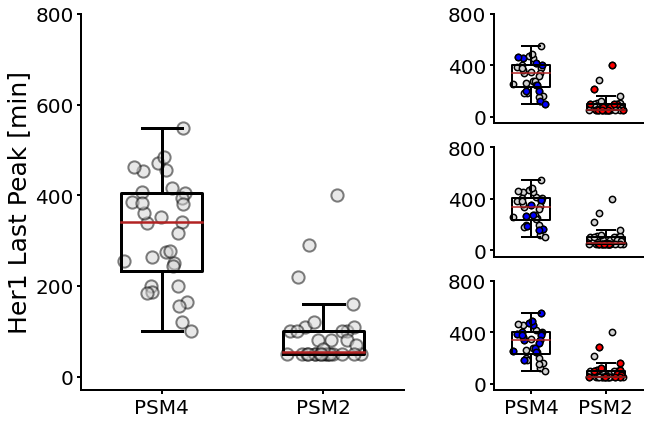

In [35]:
# Figure parameters
alpha = 0.3

values1 = PSM4_42_lp
values2 = PSM2_42_lp

jitter1 = [np.random.rand(len(elem)) for elem in values1]
jitter2 = [np.random.rand(len(elem)) for elem in values2]

fig = plt.figure(figsize=[12,6])
plt.subplot(121)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

jitter1_all = np.array([item for sublist in jitter1 for item in sublist])
jitter2_all = np.array([item for sublist in jitter2 for item in sublist])

boxprops = dict(linewidth=3, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot
plt.scatter(jitter1_all, values1_all, c='lightgray', s=150, alpha=0.5, edgecolor='black', linewidth=2)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=150, alpha=0.5, edgecolors='black', linewidth=2)

plt.xticks([0.5, 2.5], ['PSM4', 'PSM2'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-30,800])
plt.yticks(np.arange(0, 1000, 200), fontsize=20)
plt.ylabel('Her1 Last Peak [min]', fontsize=25);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(343)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[0], values1[0], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[0]+2, values2[0], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'PSM2'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
#plt.ylabel('Time [min]', fontsize=20);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(347)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[1], values1[1], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[1]+2, values2[1], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'PSM2'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(3,4,11)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[2], values1[2], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[2]+2, values2[2], c='red', s=40, edgecolors='black', linewidth=1.5)

plt.xticks([0.5, 2.5], ['PSM4', 'PSM2'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S3/Results/PSM2vsPSM4-LastPeakTimes.pdf', bbox_inches='tight')

### PSM4 vs PSM3

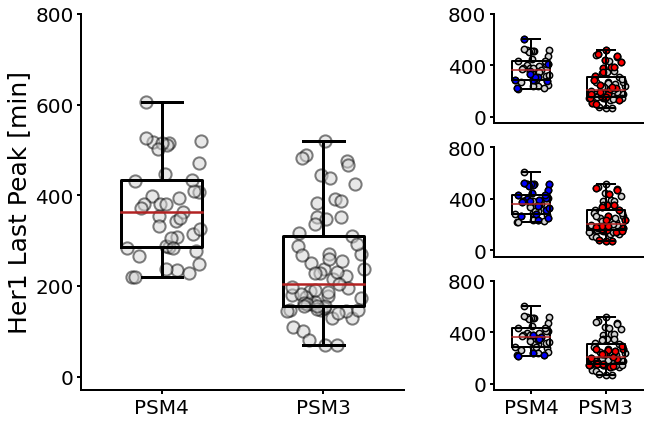

In [36]:
# Figure parameters
alpha = 0.3

values1 = PSM4_43_lp
values2 = PSM3_43_lp

jitter1 = [np.random.rand(len(elem)) for elem in values1]
jitter2 = [np.random.rand(len(elem)) for elem in values2]

fig = plt.figure(figsize=[12,6])
plt.subplot(121)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

jitter1_all = np.array([item for sublist in jitter1 for item in sublist])
jitter2_all = np.array([item for sublist in jitter2 for item in sublist])

boxprops = dict(linewidth=3, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot
plt.scatter(jitter1_all, values1_all, c='lightgray', s=150, alpha=0.5, edgecolor='black', linewidth=2)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=150, alpha=0.5, edgecolors='black', linewidth=2)

plt.xticks([0.5, 2.5], ['PSM4', 'PSM3'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-30,800])
plt.yticks(np.arange(0, 1000, 200), fontsize=20)
plt.ylabel('Her1 Last Peak [min]', fontsize=25);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(343)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[0], values1[0], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[0]+2, values2[0], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'PSM3'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
#plt.ylabel('Time [min]', fontsize=20);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(347)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[1], values1[1], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[1]+2, values2[1], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'PSM3'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(3,4,11)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[2], values1[2], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[2]+2, values2[2], c='red', s=40, edgecolors='black', linewidth=1.5)

plt.xticks([0.5, 2.5], ['PSM4', 'PSM3'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S3/Results/PSM3vsPSM4-LastPeakTimes.pdf', bbox_inches='tight')

### PSM4 vs TB

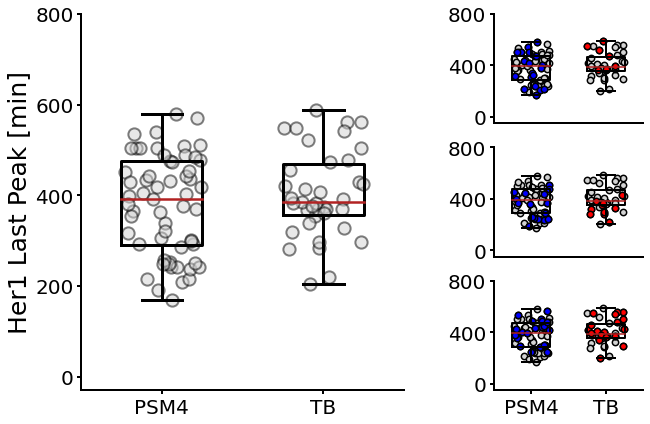

In [37]:
# Figure parameters
alpha = 0.3

values1 = PSM4_4TB_lp
values2 = PSMTB_4TB_lp

jitter1 = [np.random.rand(len(elem)) for elem in values1]
jitter2 = [np.random.rand(len(elem)) for elem in values2]

fig = plt.figure(figsize=[12,6])
plt.subplot(121)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

jitter1_all = np.array([item for sublist in jitter1 for item in sublist])
jitter2_all = np.array([item for sublist in jitter2 for item in sublist])

boxprops = dict(linewidth=3, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot
plt.scatter(jitter1_all, values1_all, c='lightgray', s=150, alpha=0.5, edgecolor='black', linewidth=2)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=150, alpha=0.5, edgecolors='black', linewidth=2)

plt.xticks([0.5, 2.5], ['PSM4', 'TB'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-30,800])
plt.yticks(np.arange(0, 1000, 200), fontsize=20)
plt.ylabel('Her1 Last Peak [min]', fontsize=25);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(343)
# Box plot
values1_all = np.array([item for sublist in values1 for item in sublist])
values2_all = np.array([item for sublist in values2 for item in sublist])

boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[0], values1[0], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[0]+2, values2[0], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'TB'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
#plt.ylabel('Time [min]', fontsize=20);
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(347)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[1], values1[1], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[1]+2, values2[1], c='red', s=40, edgecolors='black', linewidth=1.5)

#plt.xticks([0.5, 2.5], ['PSM4', 'TB'], fontsize=18)
plt.xticks([])
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(3,4,11)
# Box plot
boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=1.5, color='firebrick')
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

plt.boxplot([values1_all[~np.isnan(values1_all)], values2_all[~np.isnan(values2_all)]], \
            positions=[0.5,2.5], widths=[1,1], medianprops=medianprops,\
            boxprops=boxprops, whiskerprops=whiskerprops, \
            capprops=capprops, showfliers=False, zorder=1);

# Jitter plot

plt.scatter(jitter1_all, values1_all, c='lightgray', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2_all+2, values2_all, c='lightgray', s=40, edgecolors='black', linewidth=1.5)

plt.scatter(jitter1[2], values1[2], c='blue', s=40, edgecolor='black', linewidth=1.5)
plt.scatter(jitter2[2]+2, values2[2], c='red', s=40, edgecolors='black', linewidth=1.5)

plt.xticks([0.5, 2.5], ['PSM4', 'TB'], fontsize=20)
plt.xlim([-0.5, 3.5])
plt.ylim([-50,800])
plt.yticks(np.arange(0, 1000, 400), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S3/Results/TBvsPSM4-LastPeakTimes.pdf', bbox_inches='tight')

## Number of peaks for PSM3, PSM4 and TB

<a id='peaks'></a>

If you want to go to the top of the notebook: [TOP](#top)

In [3]:
peaks = np.arange(1,10,1)
PSM4_peaks_df = pd.read_excel('../Data/Figure S3/Axial_Peak_Numbers_checked.xlsx', sheet_name='PSM4', header=[0])
PSM4_peaks = np.sum(PSM4_peaks_df[peaks])

PSM3_peaks_df = pd.read_excel('../Data/Figure S3/Axial_Peak_Numbers_checked.xlsx', sheet_name='PSM3', header=[0])
PSM3_peaks = np.sum(PSM3_peaks_df[peaks])

TB_peaks_df = pd.read_excel('../Data/Figure S3/Axial_Peak_Numbers_checked.xlsx', sheet_name='TB', header=[0])
TB_peaks = np.sum(TB_peaks_df[peaks])

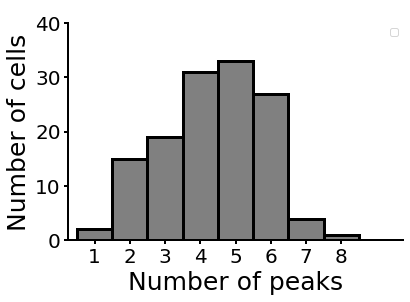

In [4]:
fig, ax = plt.subplots(figsize=[6,4])

PSM4_peaks.plot.bar(rot=0, subplots=True, color='gray', edgecolor='black', 
                           linewidth=3, width=1, ax=ax)
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8], fontsize=20)
plt.yticks(np.arange(0,50,10), fontsize=20)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.ylim([0,40])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

fig.savefig('../Data/Figure S3/Results/PeakHistogram-PSM4.pdf', format='pdf', bbox_inches='tight')

In [5]:
PSM4_peaks_list = []
count = 1
for i in PSM4_peaks:
    PSM4_peaks_list += [count]*i
    count += 1

In [6]:
print('Mean Value for PSM4: %.2f peaks'%np.mean(PSM4_peaks_list))
print('Mean Value for PSM4: %.2f peaks'%np.std(PSM4_peaks_list))

Mean Value for PSM4: 4.36 peaks
Mean Value for PSM4: 1.44 peaks


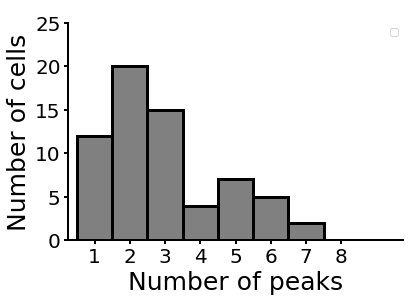

In [7]:
fig, ax = plt.subplots(figsize=[6,4])

PSM3_peaks.plot.bar(rot=0, subplots=True, color='gray', edgecolor='black', 
                           linewidth=3, width=1, ax=ax)
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8], fontsize=20)
plt.yticks(np.arange(0,30,5), fontsize=20)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.title('PSM3')
plt.ylim([0,25])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

fig.savefig('../Data/Figure S3/Results/PeakHistogram-PSM3.pdf', format='pdf', bbox_inches='tight')

In [8]:
PSM3_peaks_list = []
count = 1
for i in PSM3_peaks:
    PSM3_peaks_list += [count]*i
    count += 1

In [9]:
print('Mean Value for PSM3: %.2f peaks'%np.mean(PSM3_peaks_list))
print('Mean Value for PSM3: %.2f peaks'%np.std(PSM3_peaks_list))

Mean Value for PSM3: 2.95 peaks
Mean Value for PSM3: 1.65 peaks


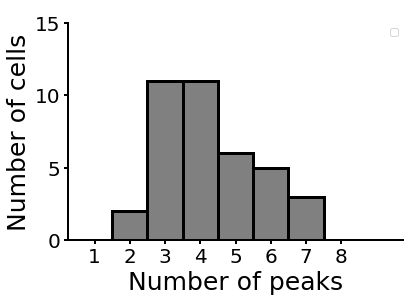

In [10]:
fig, ax = plt.subplots(figsize=[6,4])

TB_peaks.plot.bar(rot=0, subplots=True, color='gray', edgecolor='black', 
                           linewidth=3, width=1, ax=ax)
plt.xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8], fontsize=20)
plt.yticks(np.arange(0,20,5), fontsize=20)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.title('TB')
plt.ylim([0,15])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

fig.savefig('../Data/Figure S3/Results/PeakHistogram-TB.pdf', format='pdf', bbox_inches='tight')

In [11]:
TB_peaks_list = []
count = 1
for i in TB_peaks:
    TB_peaks_list += [count]*i
    count += 1

In [12]:
print('Mean Value for TB: %.2f peaks'%np.mean(TB_peaks_list))
print('Mean Value for TB: %.2f peaks'%np.std(TB_peaks_list))

Mean Value for TB: 4.26 peaks
Mean Value for TB: 1.35 peaks


## Slowing period and increasing amplitude - successive ratios


<a id='slow'></a>

If you want to go to the top of the notebook: [TOP](#top)

In [13]:
# Periods
PSM3_periods_df = pd.read_excel('../Data/Figure S3/Axial_Periods_checked.xlsx', header=[1], sheet_name='PSM3')
PSM4_periods_df = pd.read_excel('../Data/Figure S3/Axial_Periods_checked.xlsx', header=[1], sheet_name='PSM4')
TB_periods_df = pd.read_excel('../Data/Figure S3/Axial_Periods_checked.xlsx', header=[1], sheet_name='TB')

# Max Intensities
PSM3_max_df = pd.read_excel('../Data/Figure S3/Axial_Maxima_Intensity_checked.xlsx', header=[1], sheet_name='PSM3')
PSM4_max_df = pd.read_excel('../Data/Figure S3/Axial_Maxima_Intensity_checked.xlsx', header=[1], sheet_name='PSM4')
TB_max_df = pd.read_excel('../Data/Figure S3/Axial_Maxima_Intensity_checked.xlsx', header=[1], sheet_name='TB')

In [14]:
# Function to calculate the successive ratios 

ratio_func = lambda x: [x[i+1]/x[i] for i in range(len(x)-1)]

In [15]:
# TB Periods
TB_keys = TB_periods_df.keys()[1:]

TB_successive_periods = []
TB_successive_maxima = []

for i in TB_keys:
    if type(i) == int:
        if np.size(TB_periods_df[i])>0:
            TB_successive_periods.append(ratio_func(TB_periods_df[i].dropna()))
            TB_successive_maxima.append(ratio_func(TB_max_df[i].dropna()))

In [16]:
# PSM4 Periods
PSM4_keys = PSM4_periods_df.keys()[1:]

PSM4_successive_periods = []
PSM4_successive_maxima = []

for i in PSM4_keys:
    if type(i) == int:
        if np.size(PSM4_periods_df[i])>0:
            PSM4_successive_periods.append(ratio_func(PSM4_periods_df[i].dropna()))
            PSM4_successive_maxima.append(ratio_func(PSM4_max_df[i].dropna()))

In [17]:
# PSM3 Periods
PSM3_keys = PSM3_periods_df.keys()[1:]

PSM3_successive_periods = []
PSM3_successive_maxima = []

for i in PSM3_keys:
    if type(i) == int:
        if np.size(PSM3_periods_df[i])>0:
            PSM3_successive_periods.append(ratio_func(PSM3_periods_df[i].dropna()))
            PSM3_successive_maxima.append(ratio_func(PSM3_max_df[i].dropna()))

#### PSM3 Plot

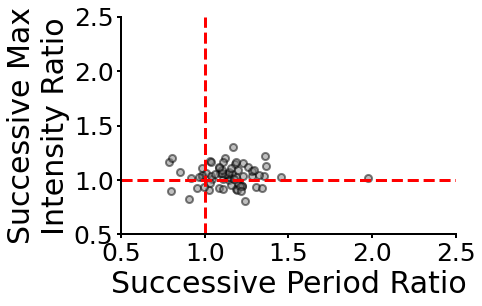

In [18]:
# PSM3 

fig = plt.figure(figsize=[6,4])
n_cells = len(PSM3_successive_maxima)

for i in range(n_cells):
    plt.scatter(PSM3_successive_periods[i], PSM3_successive_maxima[i][:-1], color='gray', s=50, linewidth=2, edgecolor='black', alpha=0.5)
        
plt.axvline(1, linewidth=3, linestyle='dashed', color='red')
plt.axhline(1, linewidth=3, linestyle='dashed', color='red')

plt.xlim([0.5,2.5])
plt.ylim([0.5,2.5])
plt.xticks(np.arange(0.5,3, 0.5), fontsize=25)
plt.yticks(np.arange(0.5,3, 0.5),fontsize=25)

plt.xlabel('Successive Period Ratio', fontsize=30)
plt.ylabel('Successive Max\nIntensity Ratio', fontsize=30)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

fig.savefig('../Data/Figure S3/Results/SuccessivePeriod-Amplitude-PSM3.pdf', format='pdf', bbox_inches='tight')

In [19]:
ratio1 = 0
n_cycles = 0
n_cells = len(PSM3_successive_maxima)

for i in range(n_cells):
    for j in range(len(PSM3_successive_maxima[i][:-1])):
        n_cycles +=1
        if PSM3_successive_maxima[i][j]>=1 and PSM3_successive_periods[i][j]>=1:
            ratio1 += 1
            
        
print('There are %d cycles that slow down from %d total.'%(ratio1, n_cycles))
print('The proportion is: %d '%((ratio1/n_cycles)*100))

There are 40 cycles that slow down from 67 total.
The proportion is: 59 


#### PSM4 Plot

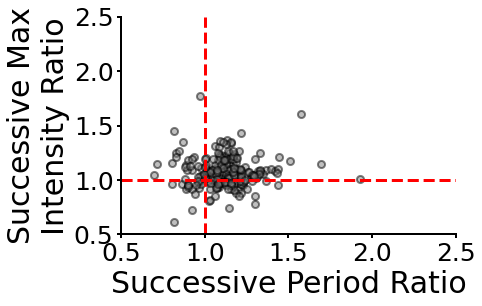

In [20]:
# PSM4 

fig = plt.figure(figsize=[6,4])
n_cells = len(PSM4_successive_maxima)

for i in range(n_cells):
    plt.scatter(PSM4_successive_periods[i], PSM4_successive_maxima[i][:-1], color='gray', s=50, linewidth=2, edgecolor='black', alpha=0.5)
        
plt.axvline(1, linewidth=3, linestyle='dashed', color='red')
plt.axhline(1, linewidth=3, linestyle='dashed', color='red')

plt.xlim([0.5,2.5])
plt.ylim([0.5,2.5])
plt.xticks(np.arange(0.5,3, 0.5), fontsize=25)
plt.yticks(np.arange(0.5,3, 0.5),fontsize=25)

plt.xlabel('Successive Period Ratio', fontsize=30)
plt.ylabel('Successive Max\nIntensity Ratio', fontsize=30)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

fig.savefig('../Data/Figure S3/Results/SuccessivePeriod-Amplitude-PSM4.pdf', format='pdf', bbox_inches='tight')

In [21]:
ratio1 = 0
n_cycles = 0
n_cells = len(PSM4_successive_maxima)

for i in range(n_cells):
    for j in range(len(PSM4_successive_maxima[i][:-1])):
        n_cycles +=1
        if PSM4_successive_maxima[i][j]>=1 and PSM4_successive_periods[i][j]>=1:
            ratio1 += 1
            
        
print('There are %d cycles that slow down from %d total.'%(ratio1, n_cycles))
print('The proportion is: %d '%((ratio1/n_cycles)*100))

There are 127 cycles that slow down from 220 total.
The proportion is: 57 


#### TB Plot

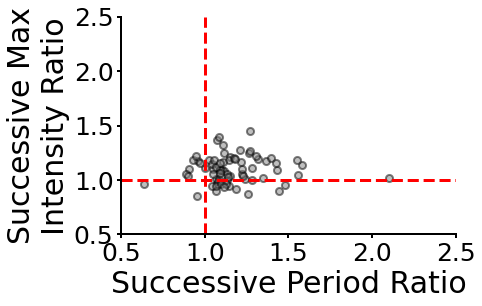

In [22]:
# TB 

fig = plt.figure(figsize=[6,4])
n_cells = len(TB_successive_maxima)

for i in range(n_cells):
    plt.scatter(TB_successive_periods[i], TB_successive_maxima[i][:-1], color='gray', s=50, linewidth=2, edgecolor='black', alpha=0.5)
        
plt.axvline(1, linewidth=3, linestyle='dashed', color='red')
plt.axhline(1, linewidth=3, linestyle='dashed', color='red')

plt.xlim([0.5,2.5])
plt.ylim([0.5,2.5])
plt.xticks(np.arange(0.5,3, 0.5), fontsize=25)
plt.yticks(np.arange(0.5,3, 0.5),fontsize=25)

plt.xlabel('Successive Period Ratio', fontsize=30)
plt.ylabel('Successive Max\nIntensity Ratio', fontsize=30)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

fig.savefig('../Data/Figure S3/Results/SuccessivePeriod-Amplitude-TB.pdf', format='pdf', bbox_inches='tight')

In [23]:
ratio1 = 0
n_cycles = 0
n_cells = len(TB_successive_maxima)

for i in range(n_cells):
    for j in range(len(TB_successive_maxima[i][:-1])):
        n_cycles +=1
        if TB_successive_maxima[i][j]>=1 and TB_successive_periods[i][j]>=1:
            ratio1 += 1
            
        
print('There are %d cycles that slow down from %d total.'%(ratio1, n_cycles))
print('The proportion is: %d '%((ratio1/n_cycles)*100))

There are 48 cycles that slow down from 72 total.
The proportion is: 66 
